Linear regression can be applied to only continues varibles not categorical values!!


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [19]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [20]:
df=df.fillna(df.mode().iloc[0])

In [21]:
df.isnull().sum()

passenger_id    0
pclass          0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body            0
home.dest       0
survived        0
dtype: int64

In [22]:
df=df.drop(['name','ticket','cabin','passenger_id','home.dest'],axis=1)

Mean Squared Error: 0.022323204864964283
R2 Score: 0.9069866463959821


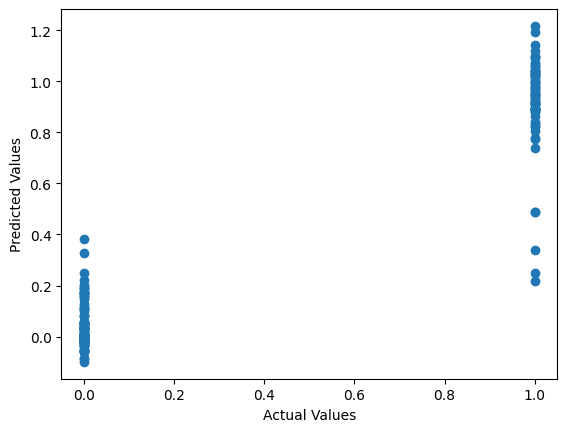

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
# df['embarked']=le.fit_transform(df['embarked']) 
X=df.drop('survived',axis=1)
y=df['survived']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr=LinearRegression()
# encode categorical (object) columns so LinearRegression can fit
combined = pd.get_dummies(pd.concat([X_train, X_test]), drop_first=True)
X_train = combined.loc[X_train.index]
X_test = combined.loc[X_test.index]

lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


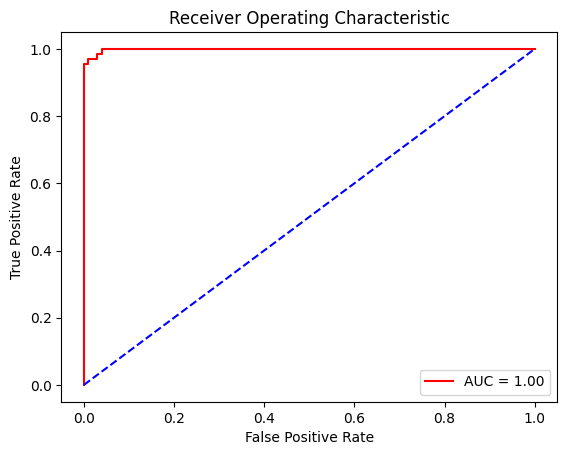

In [24]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],color='blue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()